### Importing Necessary Packages

In [ ]:
library(tidyverse)

#### Reading data (I created sample data for this job application)

In [ ]:
df <- read.csv("Sample.csv", stringsAsFactors = FALSE)

#### Seperating Student Id from the dataset

In [ ]:
id_col  <- df[[1]]
items   <- df[ , -1]


#### Defining the Key (I assigned a random key for this application)

In [ ]:
key <- c(1,0,1,1,0,1,0,1,0,1)

#### Evaluation
Computing the correct and wrong answers by comparing each student value with the key

In [ ]:
correct_mat <- as.data.frame(sweep(items, 2, key, FUN = "==")) %>%
  mutate(across(everything(), as.integer))

Building student summary

In [ ]:
student_summary <- tibble(
  StudentID   = id_col,
  Total       = rowSums(correct_mat, na.rm = TRUE),
  Percent     = rowMeans(correct_mat, na.rm = TRUE),
  Zscore      = as.numeric(scale(rowSums(correct_mat, na.rm = TRUE))) # I included Z score because it gives a clear picture of a student reformance relatively rathar than absolutely.
) %>%
  arrange(desc(Total)) %>%
  mutate(
    Rank = row_number(), 
    Proficiency = case_when(
      Percent >= 0.90 ~ "Excellent",
      Percent >= 0.70 ~ "Proficient",
      Percent >= 0.50 ~ "Basic",
      TRUE            ~ "Needs Support"
    )
  )

# Printing the summary
print(student_summary)



# A tibble: 10 × 6
   StudentID Total Percent Zscore  Rank Proficiency  
   <chr>     <dbl>   <dbl>  <dbl> <int> <chr>        
 1 S003          7     0.7  1.52      1 Proficient   
 2 S008          7     0.7  1.52      2 Proficient   
 3 S001          5     0.5  0.254     3 Basic        
 4 S005          5     0.5  0.254     4 Basic        
 5 S010          5     0.5  0.254     5 Basic        
 6 S004          4     0.4 -0.380     6 Needs Support
 7 S006          4     0.4 -0.380     7 Needs Support
 8 S007          4     0.4 -0.380     8 Needs Support
 9 S009          3     0.3 -1.01      9 Needs Support
10 S002          2     0.2 -1.65     10 Needs Support


#### Visualizing the Insights

1) Score distribution

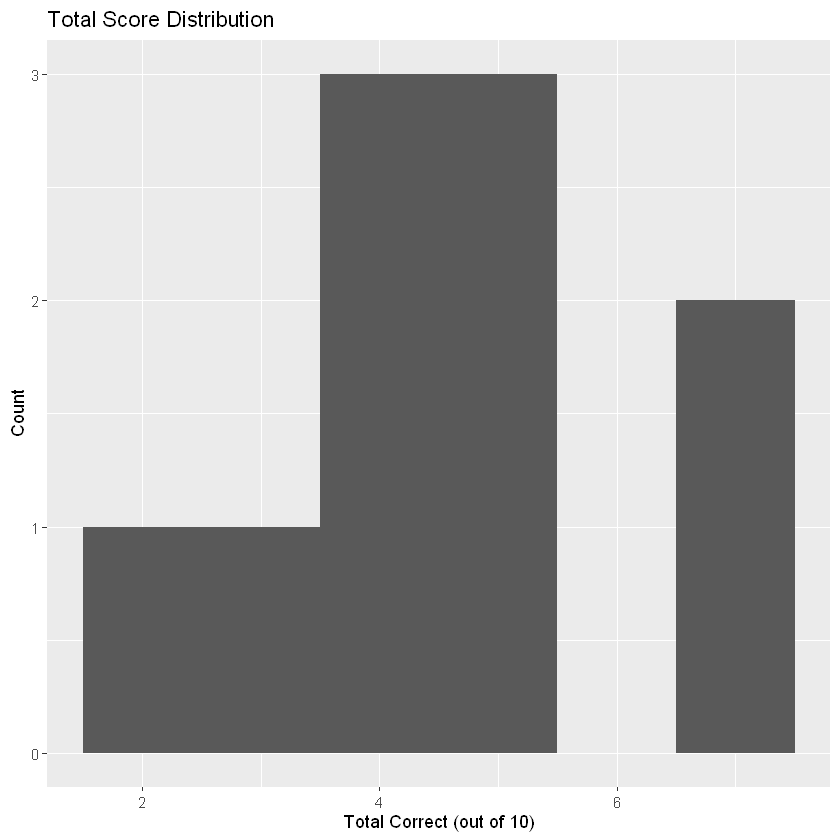

In [ ]:
ggplot(student_summary, aes(x = Total)) +
  geom_histogram(binwidth = 1) +
  labs(title = "Total Score Distribution", x = "Total Correct (out of 10)", y = "Count")



Percent by student (ordered in ascending order)

- If we need in descending order we can just do reorder(StudentID, -Percent), I chose ascending because I used to look at my students performance when I was a TA in this way.

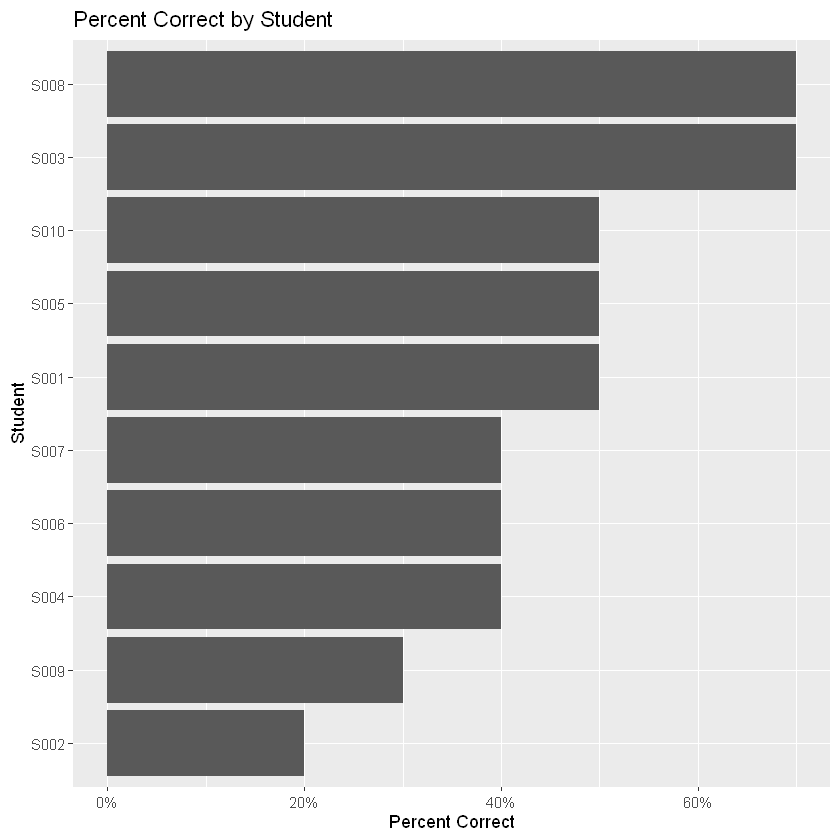

In [ ]:
ggplot(student_summary, aes(x = reorder(StudentID, Percent), y = Percent)) + 
  geom_col() +
  coord_flip() +
  scale_y_continuous(labels = scales::percent) +
  labs(title = "Percent Correct by Student", x = "Student", y = "Percent Correct")



Students with exceptional grades and students who need private sessions

In [ ]:
top5    <- head(student_summary, 3)
bottom5 <- tail(student_summary, 3)
print(top5)
print(bottom5)

# A tibble: 3 × 6
  StudentID Total Percent Zscore  Rank Proficiency
  <chr>     <dbl>   <dbl>  <dbl> <int> <chr>      
1 S003          7     0.7  1.52      1 Proficient 
2 S008          7     0.7  1.52      2 Proficient 
3 S001          5     0.5  0.254     3 Basic      
# A tibble: 3 × 6
  StudentID Total Percent Zscore  Rank Proficiency  
  <chr>     <dbl>   <dbl>  <dbl> <int> <chr>        
1 S007          4     0.4 -0.380     8 Needs Support
2 S009          3     0.3 -1.01      9 Needs Support
3 S002          2     0.2 -1.65     10 Needs Support


Writing the summary into csv file to store the results

In [14]:
write.csv(student_summary, "student_performance_summary.csv", row.names = FALSE)